In [ ]:
!pip install split-folders

In [ ]:
import tensorflow as tf

In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Sign Recognition Project/asl_dataset', output="output", seed=1337, ratio=(.7, 0.2,0.1)) 


Copying files: 2515 files [12:36,  3.33 files/s]


### Convert the SavedModel to TFLite


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(36, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 41, 41, 128)       7385

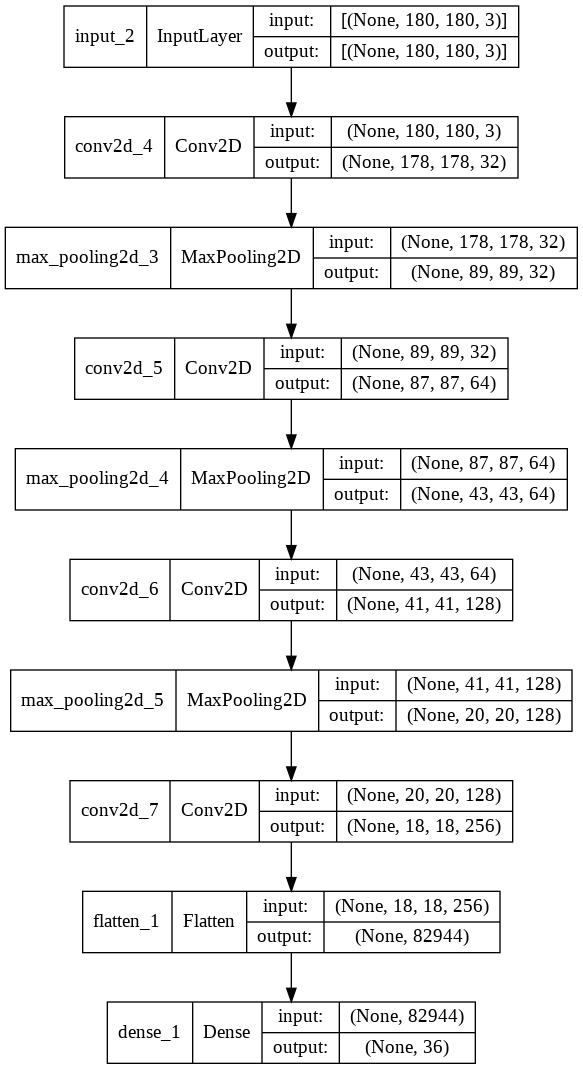

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)


In [ ]:
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory("/content/output/train",
                                            image_size=(180, 180), batch_size=25)

Found 1760 files belonging to 36 classes.


In [ ]:
validation_dataset = image_dataset_from_directory("/content/output/val",
                                             image_size=(180, 180),batch_size=25)

Found 503 files belonging to 36 classes.


In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="Sign_Recognition_180.keras",
 save_best_only=True,
 monitor="val_loss")
]

In [ ]:
history = model.fit(
 train_dataset,epochs=20,
 validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/20
71/71 [==============================] - 16s 89ms/step - loss: 14.4514 - accuracy: 0.7170 - val_loss: 0.5051 - val_accuracy: 0.8509
Epoch 2/20
71/71 [==============================] - 6s 78ms/step - loss: 0.3218 - accuracy: 0.9176 - val_loss: 0.5950 - val_accuracy: 0.8449
Epoch 3/20
71/71 [==============================] - 6s 80ms/step - loss: 0.3449 - accuracy: 0.9307 - val_loss: 0.3393 - val_accuracy: 0.9423
Epoch 4/20
71/71 [==============================] - 6s 79ms/step - loss: 0.1236 - accuracy: 0.9699 - val_loss: 0.5210 - val_accuracy: 0.9245
Epoch 5/20
71/71 [==============================] - 6s 80ms/step - loss: 0.0781 - accuracy: 0.9790 - val_loss: 0.2568 - val_accuracy: 0.9642
Epoch 6/20
71/71 [==============================] - 6s 78ms/step - loss: 0.2882 - accuracy: 0.9716 - val_loss: 0.7187 - val_accuracy: 0.9344
Epoch 7/20
71/71 [==============================] - 6s 80ms/step - loss: 0.0698 - accuracy: 0.9881 - val_loss: 0.4710 - val_accuracy: 0.9523
Epoch 8/20


In [ ]:
model.save('Sign_Recognition_model_180.h5')

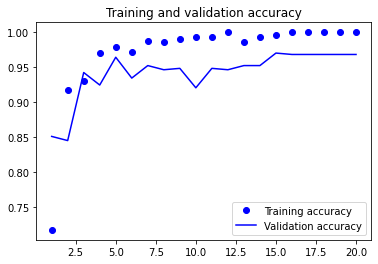

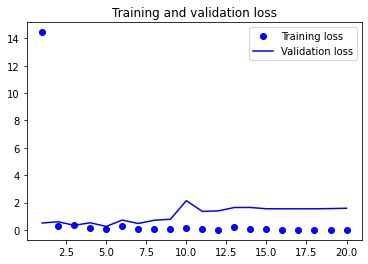

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_dataset = image_dataset_from_directory("/content/output/test",
                                             image_size=(180, 180),batch_size=25)

Found 252 files belonging to 36 classes.


In [ ]:
model.evaluate(test_dataset)

11/11 [==============================] - 1s 34ms/step - loss: 2.2271 - accuracy: 0.9206


[2.2270901203155518, 0.920634925365448]

# convert keras to .tflight model

In [ ]:
import tensorflow as tf
import os 

In [ ]:
# convert keras model to tflite 
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [ ]:
from keras.models import load_model
model = load_model("/content/Sign_Recognition_model_180.h5")

TF_LITE_MODEL_FILE_NAME = "tflite_model.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# or using another method

# Save the model.
with open('tflite_model_another.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpjur8en9x/assets


INFO:tensorflow:Assets written to: /tmp/tmpjur8en9x/assets


File size: 13184.887 Kilobytes
INFO:tensorflow:Assets written to: /tmp/tmp5hol4pws/assets


INFO:tensorflow:Assets written to: /tmp/tmp5hol4pws/assets


In [ ]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])


Input Shape: [  1 180 180   3]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 36]
Output Type: <class 'numpy.float32'>


In [ ]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-qf4kfut6
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-qf4kfut6
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=173744 sha256=e9f3ff0c6357f9a4780a22797f2dfeef1b436b148e2bffbf0ca0221f1512ff20
  Stored in directory: /tmp/pip-ephem-wheel-cache-kxohptv9/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


In [ ]:
!pip install tensorflow==1.15

# Using pre-trained model

#Feature extraction with a pretrained model

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
 weights="imagenet",
 include_top=False,
 input_shape=(180, 180, 3))

In [ ]:
import numpy as np
def get_features_and_labels(dataset):
 all_features = []
 all_labels = []
 for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
 return np.concatenate(all_features), np.concatenate(all_labels)


In [ ]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

(1760, 5, 5, 512)

#Defining and training the densely connected classifier

In [ ]:
inputs = keras.Input(shape=(5,5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(36, activation="softmax")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="feature_extraction.keras",
 save_best_only=True,
 monitor="val_loss") ]

In [ ]:
history = model.fit(
 train_features, train_labels,
 epochs=50,
 validation_data=(val_features, val_labels),
 callbacks=callbacks)

Epoch 1/50
55/55 [==============================] - 1s 12ms/step - loss: 19.1676 - accuracy: 0.6705 - val_loss: 11.1704 - val_accuracy: 0.8489
Epoch 2/50
55/55 [==============================] - 1s 11ms/step - loss: 6.1643 - accuracy: 0.8795 - val_loss: 6.5336 - val_accuracy: 0.9026
Epoch 3/50
55/55 [==============================] - 1s 10ms/step - loss: 4.3074 - accuracy: 0.9131 - val_loss: 1.1619 - val_accuracy: 0.9722
Epoch 4/50
55/55 [==============================] - 0s 8ms/step - loss: 2.5067 - accuracy: 0.9398 - val_loss: 1.5263 - val_accuracy: 0.9543
Epoch 5/50
55/55 [==============================] - 0s 9ms/step - loss: 3.2204 - accuracy: 0.9455 - val_loss: 1.6428 - val_accuracy: 0.9523
Epoch 6/50
55/55 [==============================] - 1s 9ms/step - loss: 1.8472 - accuracy: 0.9591 - val_loss: 0.8371 - val_accuracy: 0.9702
Epoch 7/50
55/55 [==============================] - 0s 8ms/step - loss: 1.7892 - accuracy: 0.9642 - val_loss: 8.4783 - val_accuracy: 0.9165
Epoch 8/50
55/5

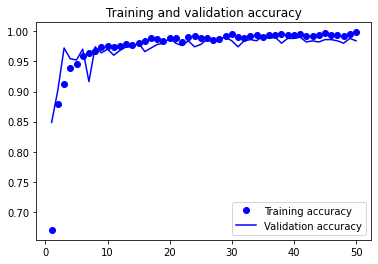

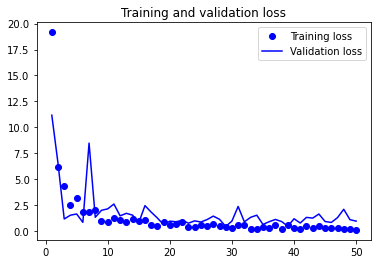

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
model.save('sign_recognition_language_asl.h5')

#Downloas Split DataSet Folders

In [ ]:
from google.colab import files


In [ ]:
files.download('/content/Sign_Classification/test')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>